1. Download the dataset: Dataset.
2. Load the dataset.

In [41]:
import pandas as pd

In [2]:
df =pd.read_csv('Churn_Modelling.csv')

In [7]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
df = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

In [10]:
df['HasCrCard'] = df['HasCrCard'].astype('category')

In [12]:
df['IsActiveMember'] = df['IsActiveMember'].astype('category')
df['Exited'] = df['Exited'].astype('category')

In [13]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


3. Perform Below Visualizations:

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

Univariate Analysis:

<AxesSubplot:ylabel='CreditScore'>

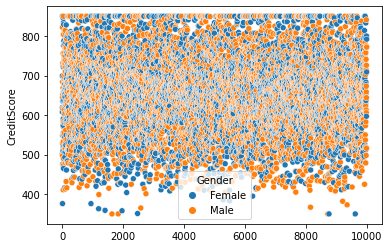

In [5]:
sns.scatterplot(x=df.index,y=df['CreditScore'],hue=df['Gender'])

<AxesSubplot:xlabel='Geography', ylabel='CreditScore'>

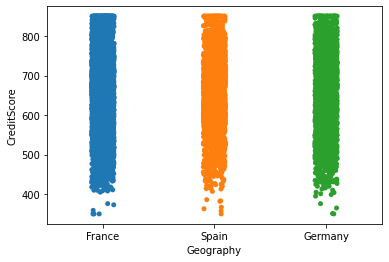

In [6]:
sns.stripplot(x=df['Geography'],y=df['CreditScore'])

Bivariate Analysis, Multivariate Analysis:

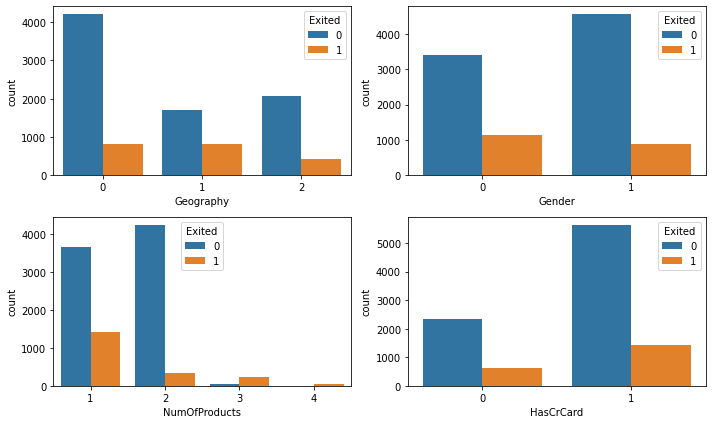

In [45]:
category = df.drop(columns=['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary'])
rows = int(np.ceil(category.shape[1] / 2)) - 1

fig, axes = plt.subplots(nrows=rows, ncols=2, figsize=(10,6))
axes = axes.flatten()

for row in range(rows):
    cols = min(2, category.shape[1] - row*2)
    for col in range(cols):
        col_name = category.columns[2 * row + col]
        ax = axes[row*2 + col]       

        sns.countplot(data=category, x=col_name, hue="Exited", ax=ax);
        
plt.tight_layout()

4. Perform descriptive statistics on the dataset.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CreditScore      10000 non-null  int64   
 1   Geography        10000 non-null  object  
 2   Gender           10000 non-null  object  
 3   Age              10000 non-null  int64   
 4   Tenure           10000 non-null  int64   
 5   Balance          10000 non-null  float64 
 6   NumOfProducts    10000 non-null  int64   
 7   HasCrCard        10000 non-null  category
 8   IsActiveMember   10000 non-null  category
 9   EstimatedSalary  10000 non-null  float64 
 10  Exited           10000 non-null  category
dtypes: category(3), float64(2), int64(4), object(2)
memory usage: 654.8+ KB


In [15]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,100090.239881
std,96.653299,10.487806,2.892174,62397.405202,0.581654,57510.492818
min,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,100193.915000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,149388.247500
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000


5. Handle the Missing values.

In [16]:
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

No missing values found in the dataset.

Unique values in the category and object datatype

In [19]:
for i in df:
    if df[i].dtype=='object' or df[i].dtype=='category':
        print(i+" has "+str(len(set(df[i])))+" unique values they are "+str(set(df[i])))

Geography has 3 unique values they are {'Spain', 'France', 'Germany'}
Gender has 2 unique values they are {'Female', 'Male'}
HasCrCard has 2 unique values they are {0, 1}
IsActiveMember has 2 unique values they are {0, 1}
Exited has 2 unique values they are {0, 1}


6. Find the outliers and replace the outliers Checking for outliers.

In [20]:
def box_scatter(data, x, y):    
    fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(16,6))
    sns.boxplot(data=data, x=x, ax=ax1)
    sns.scatterplot(data=data, x=x,y=y,ax=ax2)

Bivariate Outliers: 19


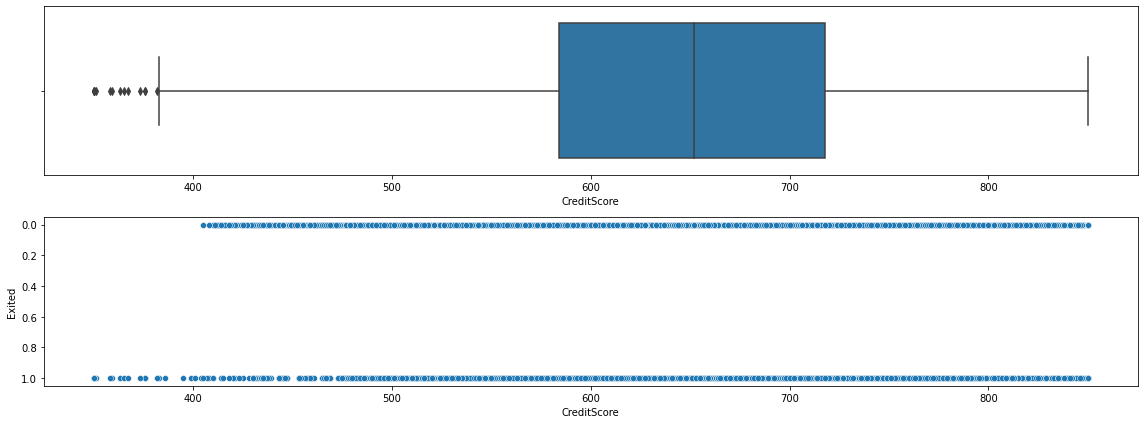

In [23]:
box_scatter(df,'CreditScore','Exited');
plt.tight_layout()
print(f"Bivariate Outliers: {len(df.loc[df['CreditScore'] < 400])}")

 Bivariate Outliers: 3


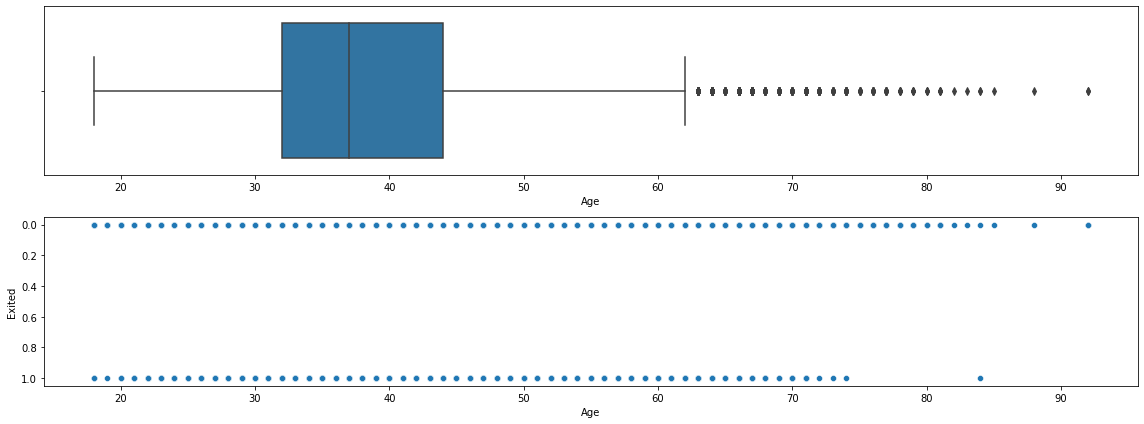

In [24]:
box_scatter(df,'Age','Exited');
plt.tight_layout()
print(f" Bivariate Outliers: {len(df.loc[df['Age'] > 87])}")

 Bivariate Outliers: 4


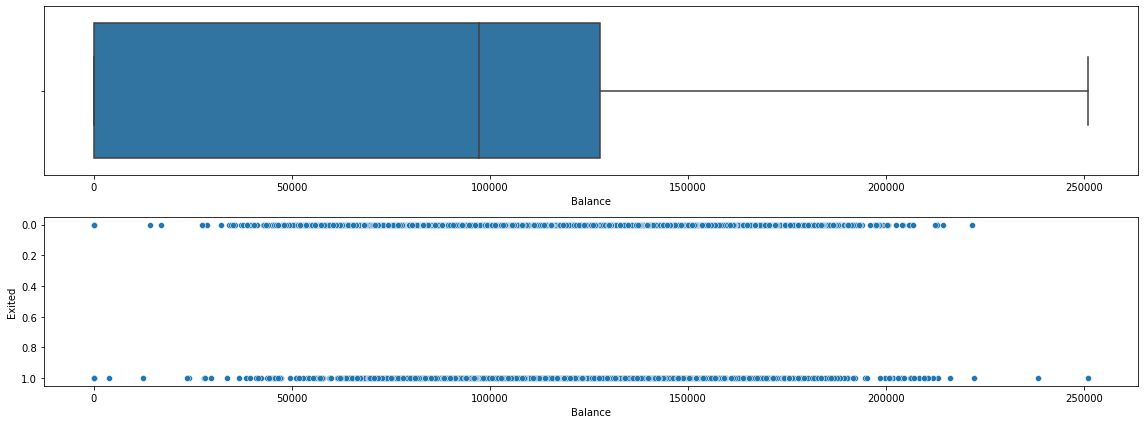

In [25]:
box_scatter(df,'Balance','Exited');
plt.tight_layout()
print(f" Bivariate Outliers: {len(df.loc[df['Balance'] > 220000])}")

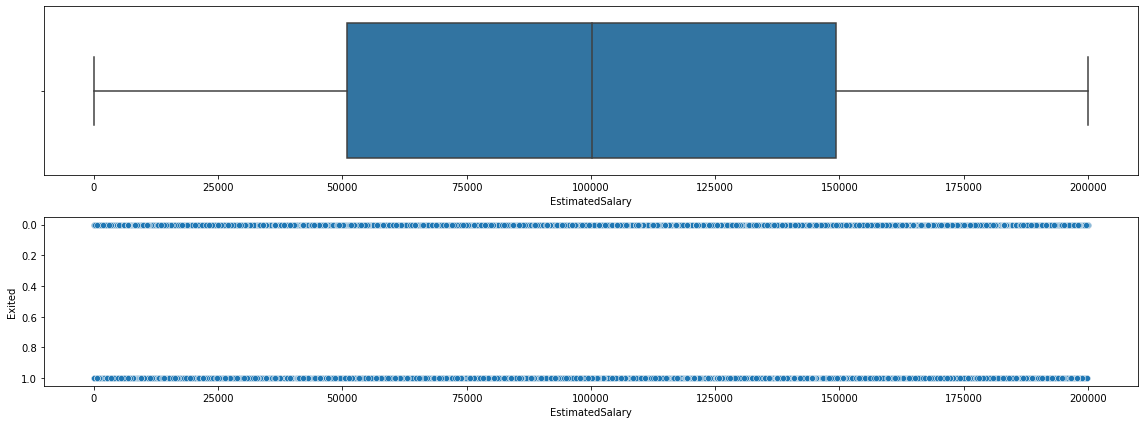

In [26]:
box_scatter(df,'EstimatedSalary','Exited');
plt.tight_layout()

Removing outliers

# of Bivariate Outliers: 19


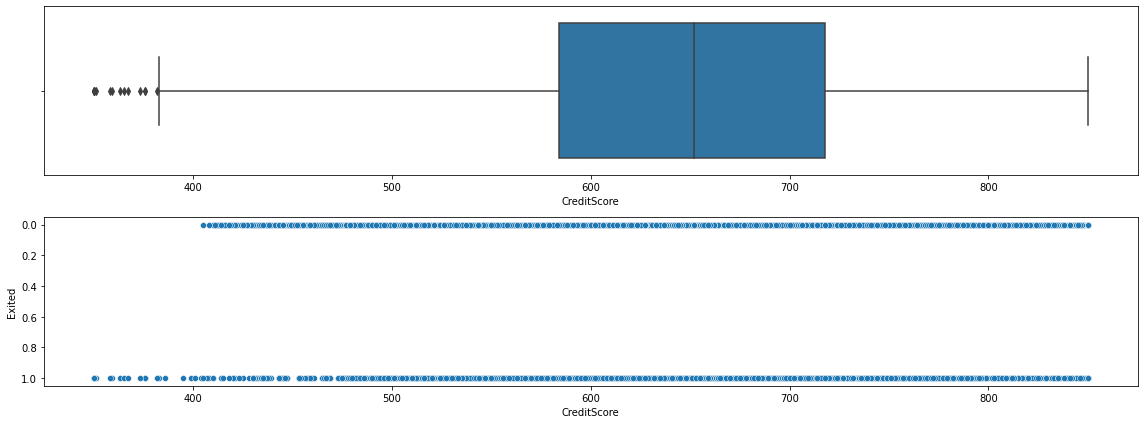

In [27]:
box_scatter(df,'CreditScore','Exited');
plt.tight_layout()
print(f"# of Bivariate Outliers: {len(df.loc[df['CreditScore'] < 400])}")

# of Bivariate Outliers: 3


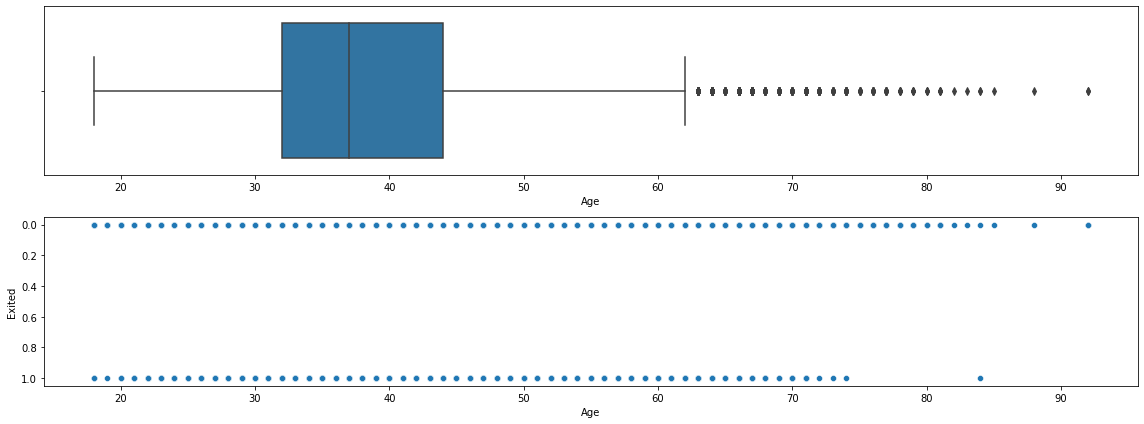

In [28]:
box_scatter(df,'Age','Exited');
plt.tight_layout()
print(f"# of Bivariate Outliers: {len(df.loc[df['Age'] > 87])}")

# of Bivariate Outliers: 4


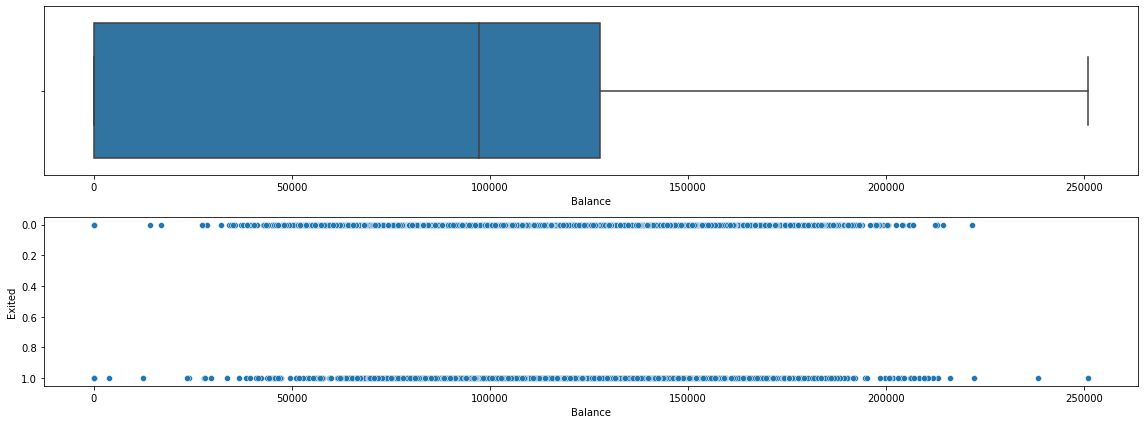

In [29]:
box_scatter(df,'Balance','Exited');
plt.tight_layout()
print(f"# of Bivariate Outliers: {len(df.loc[df['Balance'] > 220000])}")

7. Check for Categorical columns and perform encoding.

In [30]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
for i in df:
    if df[i].dtype=='object' or df[i].dtype=='category':
        df[i]=encoder.fit_transform(df[i])

In [31]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


8. Split the data into dependent and independent variables.

In [32]:
x=df.iloc[:,:-1]
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


In [33]:
y=df.iloc[:,-1]
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

9. Scale the independent variables

In [34]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [35]:
x

array([[-0.32622142, -0.90188624, -1.09598752, ...,  0.64609167,
         0.97024255,  0.02188649],
       [-0.44003595,  1.51506738, -1.09598752, ..., -1.54776799,
         0.97024255,  0.21653375],
       [-1.53679418, -0.90188624, -1.09598752, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [ 0.60498839, -0.90188624, -1.09598752, ..., -1.54776799,
         0.97024255, -1.00864308],
       [ 1.25683526,  0.30659057,  0.91241915, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [ 1.46377078, -0.90188624, -1.09598752, ...,  0.64609167,
        -1.03067011, -1.07636976]])

10.Split the data into training and testing.

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33)

In [37]:
x_train.shape

(6700, 10)

In [38]:
x_test.shape

(3300, 10)

In [39]:
y_train.shape

(6700,)

In [40]:
y_test.shape

(3300,)